### 1. Plot the outliers

To identify and visualize extreme property prices, we used boxplots and histograms for both houses and apartments.
Using the Interquartile Range (IQR) method, we detected properties with unusually high or low prices.
These outliers were clearly visible in the boxplots, with several data points far from the main distribution.
Removing them helped clean the data and avoid bias in the analysis (e.g., calculating average prices per region).

(see script "outliers_removal.py")

### 2. Which variables would you delete and why?

To identify and visualize extreme property prices, we used boxplots and histograms for both houses and apartments.
Using the Interquartile Range (IQR) method, we detected properties with unusually high or low prices.
These outliers were clearly visible in the boxplots, with several data points far from the main distribution.
Removing them helped clean the data and avoid bias in the analysis (e.g., calculating average prices per region).

(see script "outliers_removal.py")

### 3. Represent the number of properties according to their surface using a histogram.

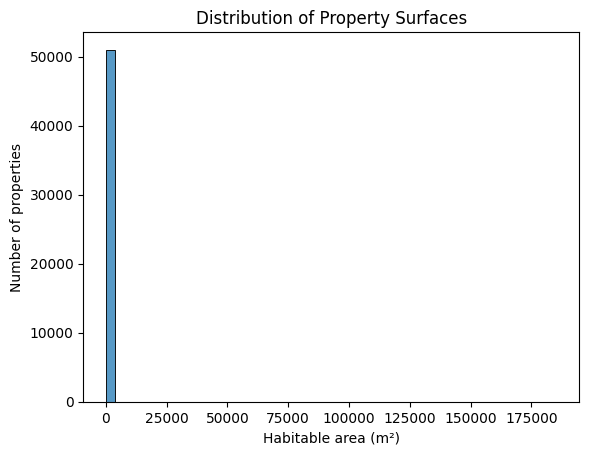

In [15]:
df = pd.read_csv("datasets/cleaned_without_outliers.csv")
sns.histplot(df["habitablesurface"], bins=50)
plt.title("Distribution of Property Surfaces")
plt.xlabel("Habitable area (m²)")
plt.ylabel("Number of properties")
plt.show()

### In your opinion, which 5 variables are the most important and why?

We have generated a correlation heatmap to show the statistical importance of the variables in relation to price.
The most important ones are: price, habitablesurface, bedroomcount, locality, propertysubtype.

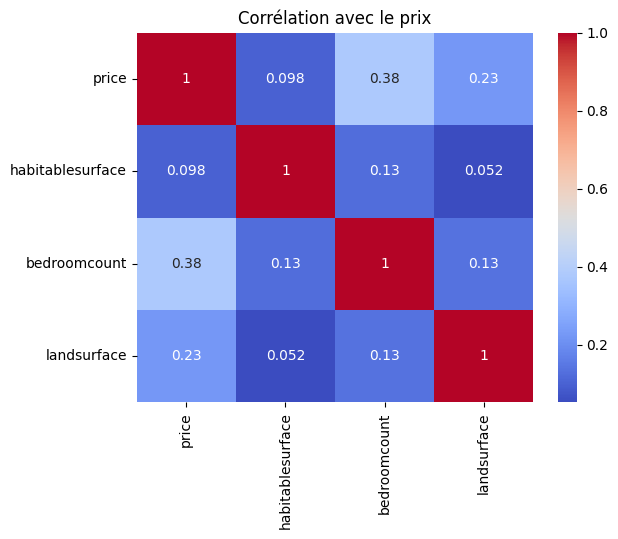

In [ ]:
corr = df[["price", "habitablesurface", "bedroomcount", "landsurface"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Price correlation")
plt.show()


### 5. What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
Based on the visualization, the top 10 most expensive municipalities in Belgium (by **average property price**) are:

- **Sint-Martens-Bodegem** stands out with the highest average price, exceeding **€4.5 million**.
- It is followed by **Duinenwater**, **Knokke-Heist Knokke**, and **Knokke-Het Zoute**, confirming the high value of properties in the **coastal area of Knokke**.

C:\Users\User\AppData\Local\Temp\ipykernel_38268\4104993162.py:45: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\User\Desktop\Becode\immo_eliza_analysis\immo_eliza_analysis_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


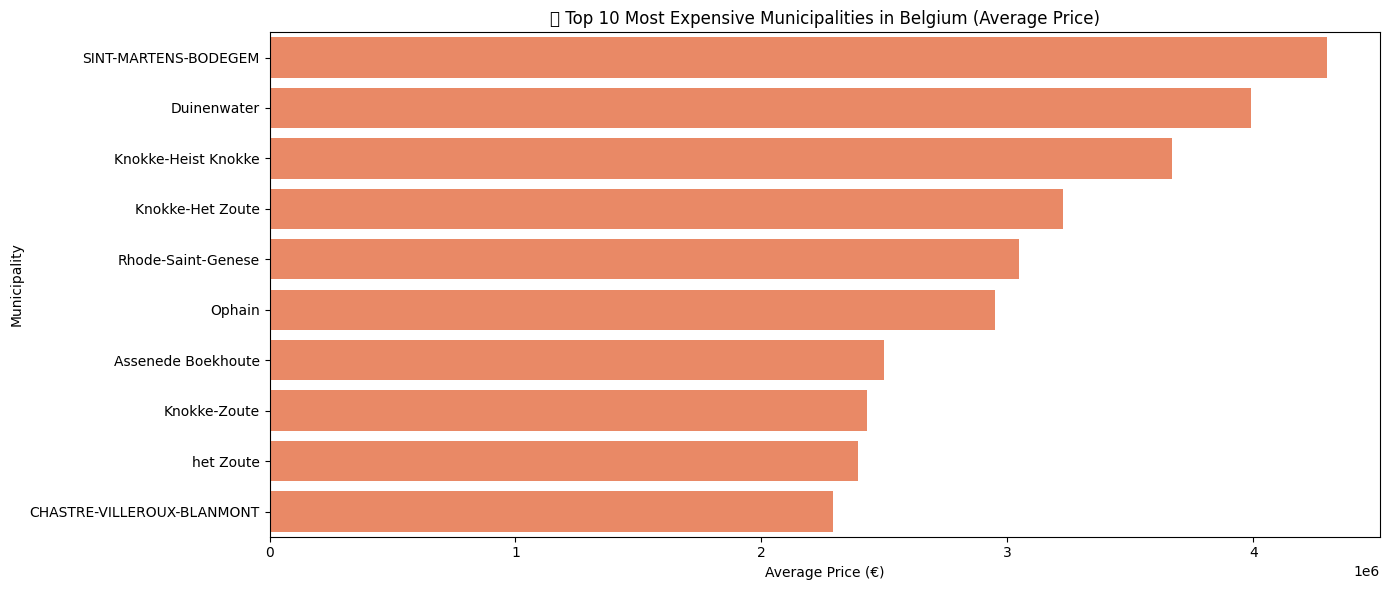

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("../immoweb-dataset.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Create price_per_m2 (avoid division by 0)
df = df[df["habitablesurface"].notna() & (df["habitablesurface"] > 0)]
df["price_per_m2"] = df["price"] / df["habitablesurface"]

# Clean locality names to group similar entries
def clean_locality(name):
    if pd.isna(name):
        return ""
    name = name.lower()
    name = re.sub(r"[\s\-_/]", "", name)
    return name.strip()

df["clean_locality"] = df["locality"].apply(clean_locality)

# Group by cleaned locality name
top_expensive = df.groupby("clean_locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price_per_m2", "mean"),
    original_name=("locality", lambda x: x.mode().iloc[0])  # most frequent name
).sort_values(by="average_price", ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_expensive.reset_index(),
    y="original_name",
    x="average_price",
    color="coral"
)
plt.title("Top 10 Most Expensive Municipalities in Belgium (Average Price)")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()


### 6. What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)

The bar chart below highlights the top 10 most expensive municipalities in **Wallonia** based on the **average property price**.

- **Wavre** is the most expensive municipality, with an average price approaching **€789,000**, significantly higher than others in the region.
- Other notable high-priced areas include **Spa**, **Gembloux**, **Ottignies**, and **Liège**, which are either touristic, close to Brussels, or known for a higher standard of living.
- Despite these figures, prices in Wallonia remain considerably **lower than those in Flanders or Brussels**, illustrating **regional disparities** in Belgium’s housing market.

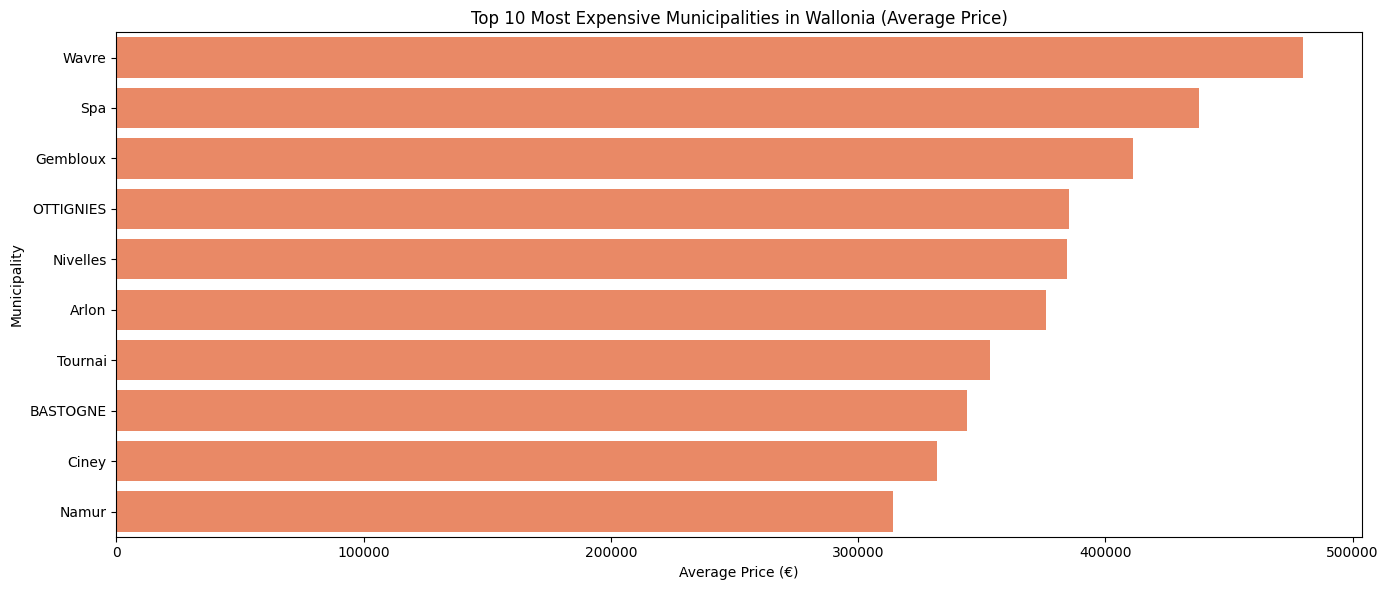

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("../immoweb-dataset.csv")
df.columns = df.columns.str.strip().str.lower()

# Clean locality names
def clean_locality(name):
    if pd.isna(name):
        return ""
    return re.sub(r"[\s\-_/]", "", name.lower().strip())

df["clean_locality"] = df["locality"].apply(clean_locality)

# List of known Walloon municipalities
walloon_localities = [
    "Namur", "Liège", "Charleroi", "Mons", "La Louvière", "Arlon", "Dinant",
    "Ottignies", "Wavre", "Nivelles", "Verviers", "Tournai", "Bastogne", "Ciney",
    "Spa", "Gembloux", "Fleurus", "Aywaille"
]
walloon_clean = [clean_locality(x) for x in walloon_localities]

# Filter dataset for Wallonia
df_wallonia = df[df["clean_locality"].isin(walloon_clean)]

# Group by and calculate stats
top_expensive_wallonia = df_wallonia.groupby("clean_locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price", "mean"),  # Replace if you have a 'price_per_m2' column
    original_name=("locality", lambda x: x.mode().iloc[0])
).sort_values(by="average_price", ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_expensive_wallonia.reset_index(),
    y="original_name",
    x="average_price",
    color="coral"
)
plt.title("Top 10 Most Expensive Municipalities in Wallonia (Average Price)")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()


### 7. What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)

This chart presents the top municipalities in **Flanders** with the highest average property prices.

- The municipality of **Knokke-Zoute** dominates the list, standing out with a remarkably high average price, far above the second-highest.
- Flanders is clearly home to the highest property prices in Belgium overall.

C:\Users\User\AppData\Local\Temp\ipykernel_38268\170476378.py:48: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\User\Desktop\Becode\immo_eliza_analysis\immo_eliza_analysis_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


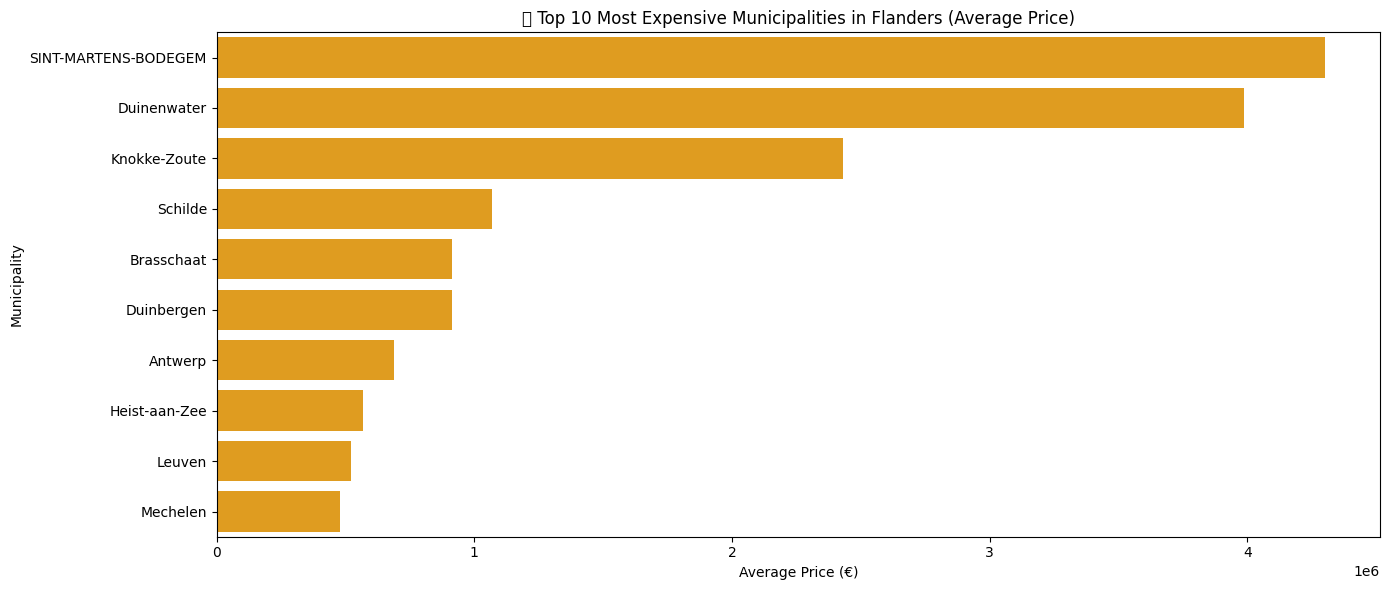

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("../immoweb-dataset.csv")
df.columns = df.columns.str.strip().str.lower()

# Clean locality names
def clean_locality(name):
    if pd.isna(name):
        return ""
    return re.sub(r"[\s\-_/]", "", name.lower().strip())

df["clean_locality"] = df["locality"].apply(clean_locality)

# List of known Flemish municipalities
flemish_localities = [
    "Knokke-Zoute", "Heist-aan-Zee", "Duinbergen", "Sint-Martens-Bodegem",
    "Brasschaat", "Leuven", "Antwerp", "Gent", "Mechelen", "Zaventem",
    "Schilde", "Sint-Niklaas", "Oostende", "Kortrijk", "Duinenwater"
]
flemish_clean = [clean_locality(x) for x in flemish_localities]

# Filter dataset for Flanders
df_flanders = df[df["clean_locality"].isin(flemish_clean)]

# Group and compute stats
top_expensive_flanders = df_flanders.groupby("clean_locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price", "mean"),  # Replace if you have 'price_per_m2'
    original_name=("locality", lambda x: x.mode().iloc[0])
).sort_values(by="average_price", ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_expensive_flanders.reset_index(),
    y="original_name",
    x="average_price",
    color="orange"
)
plt.title("Top 10 Most Expensive Municipalities in Flanders (Average Price)")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()


### 8. What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)

The chart above displays the top 10 least expensive municipalities in Belgium, based on the **average property price**.

- **Chimay Saint-Remy**, **Forêt**, and **Hornu (Boussu)** stand out as the most affordable areas, with average property prices well below €50,000.
- These municipalities are generally located in **rural or less urbanized regions**, often far from major economic centers like Brussels or Antwerp.
- The overall price range remains tight, between €35,000 and €60,000, indicating **lower variance** compared to more expensive zones.
- These localities could represent **high potential opportunities** for first-time buyers or investors seeking undervalued areas.
- Additionally, these findings reveal clear **regional inequalities** in the Belgian real estate market.

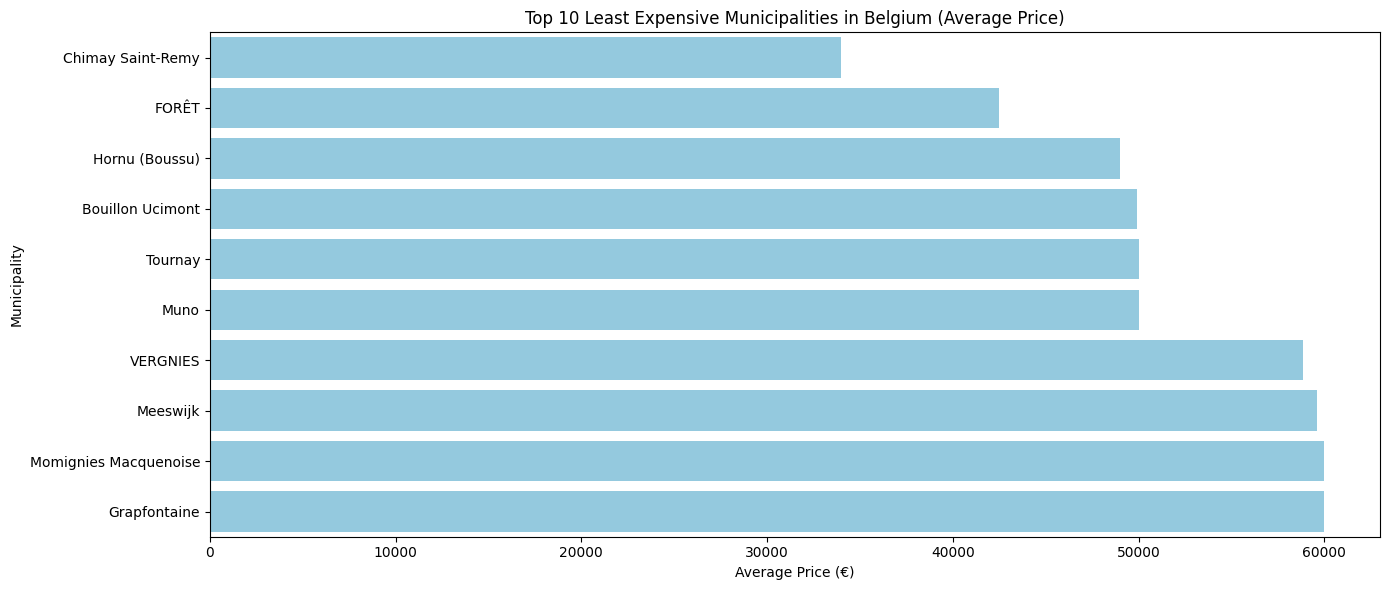

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("../immoweb-dataset.csv")
df.columns = df.columns.str.strip().str.lower()

# Clean locality names
def clean_locality(name):
    if pd.isna(name):
        return ""
    return re.sub(r"[\s\-_/]", "", name.lower().strip())

df["clean_locality"] = df["locality"].apply(clean_locality)

# Group by cleaned locality and calculate statistics
least_expensive = df.groupby("clean_locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price", "mean"),  # Replace if 'price_per_m2' exists in dataset
    original_name=("locality", lambda x: x.mode().iloc[0])
).sort_values(by="average_price", ascending=True).head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=least_expensive.reset_index(),
    y="original_name",
    x="average_price",
    color="skyblue"
)
plt.title("Top 10 Least Expensive Municipalities in Belgium (Average Price)")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()


### 9. What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)

he bar chart highlights the top 10 least expensive municipalities in Wallonia based on the **average property price**.

- **Chimay Saint-Remy** appears to be the most affordable, with an average price around **€34,000**.
- Other municipalities such as **Bouillon Ucimont**, **Muno**, and **Tournay** follow closely with prices generally below **€60,000**.
- These localities are mostly situated in **rural or remote regions**, which likely explains the lower market demand and thus lower property prices.
- These insights may benefit first-time buyers or investors looking for low-cost real estate opportunities in southern Belgium.

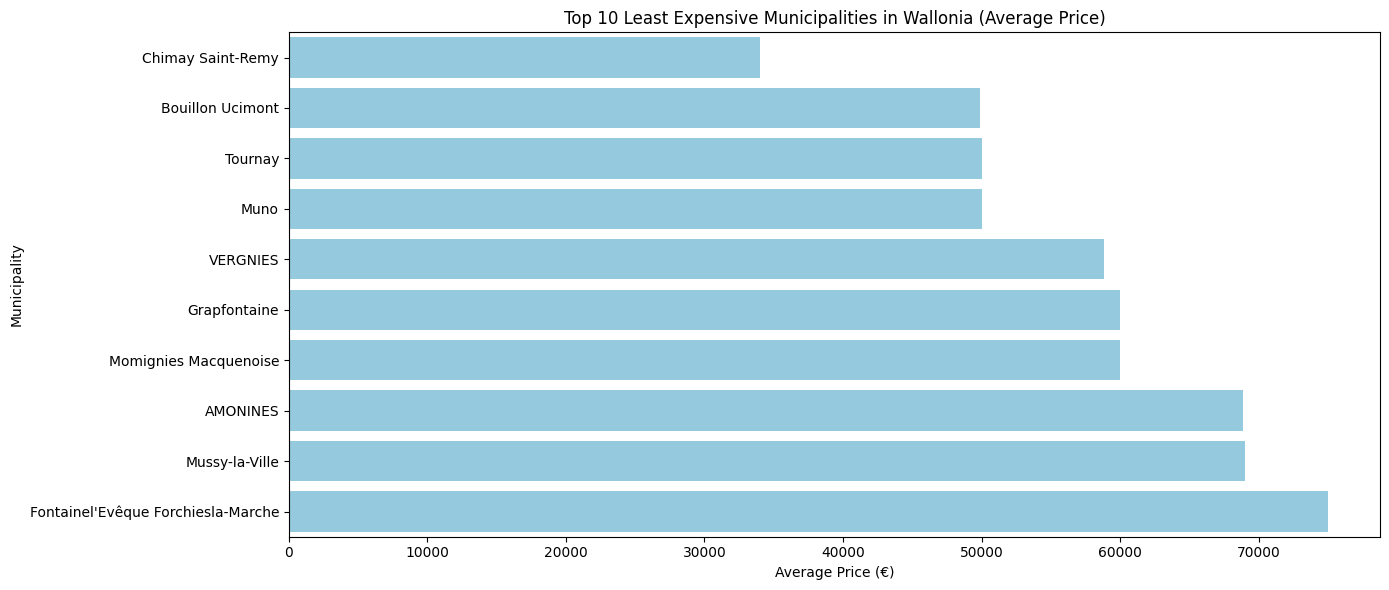

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv("../immoweb-dataset.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Clean locality strings
def clean_locality(name):
    if pd.isna(name):
        return ""
    name = name.lower()
    name = re.sub(r"[\s\-_/]", "", name)
    return name.strip()

df["clean_locality"] = df["locality"].apply(clean_locality)

# Filter municipalities in Wallonia by postcode range
df_wallonia = df[df["postcode"].between(6000, 6999, inclusive="both")].copy()

# Compute average, median, and price per m²
least_expensive_wallonia = df_wallonia.groupby("clean_locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price", lambda x: (x / df_wallonia.loc[x.index, "habitablesurface"]).mean()),
    original_name=("locality", lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
).sort_values(by="average_price", ascending=True).head(10)

# Plot the results
plt.figure(figsize=(14, 6))
sns.barplot(
    data=least_expensive_wallonia.reset_index(),
    y="original_name", x="average_price", color="skyblue"
)
plt.title("Top 10 Least Expensive Municipalities in Wallonia (Average Price)")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()


### 10. What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

This figure lists the 10 least expensive municipalities in **Flanders**.

- **Meeswijk** ranks as the most affordable locality, with an average property price of just over **€60,000**, which is remarkably low for the Flemish region.

- Other budget-friendly areas include **Moelingen, Kauille**, and **Rutten**, all under €130,000 on average.

- The price range among these municipalities is relatively narrow, with all average prices remaining well below **€200,000**.

C:\Users\User\AppData\Local\Temp\ipykernel_38268\3485959100.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["price_per_m2"].replace([float("inf"), -float("inf")], pd.NA, inplace=True)


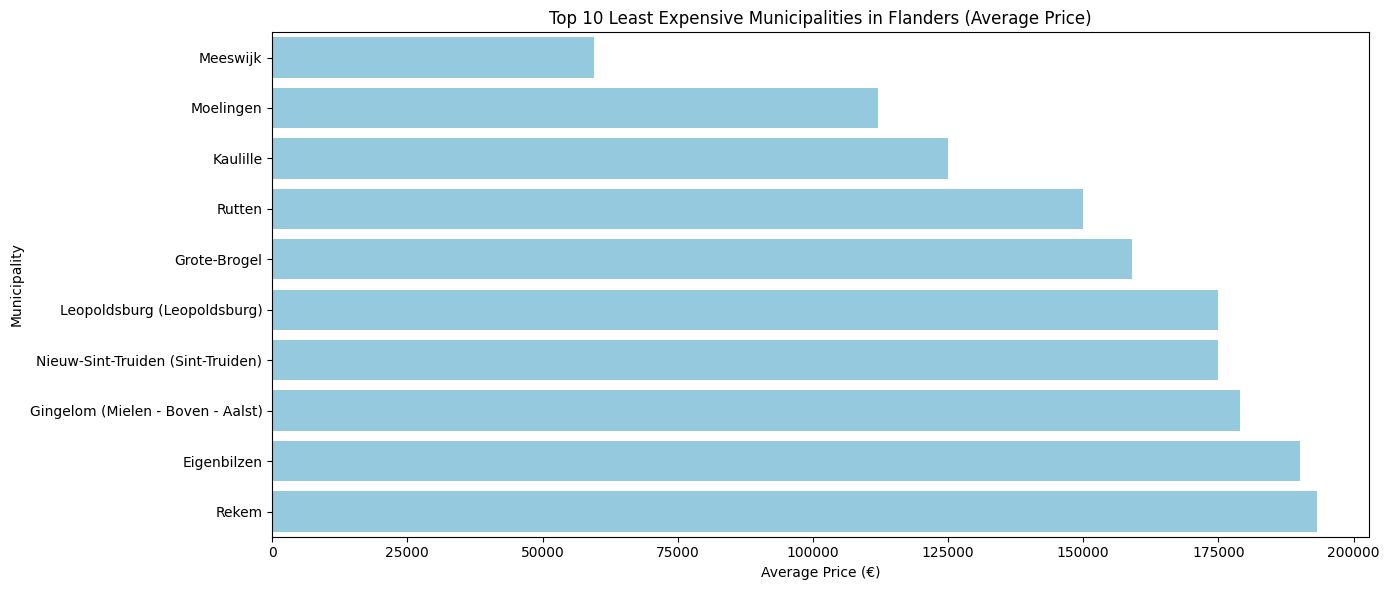

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv("../immoweb-dataset.csv")
df.columns = df.columns.str.strip().str.lower()

# Clean locality names for grouping
def clean_locality(name):
    if pd.isna(name):
        return ""
    name = name.lower()
    name = re.sub(r"[\s\-_/]", "", name)
    return name.strip()

df["clean_locality"] = df["locality"].apply(clean_locality)

# Create price_per_m2 if it doesn't exist
if "price_per_m2" not in df.columns:
    df["price_per_m2"] = df["price"] / df["habitablesurface"]
    df["price_per_m2"].replace([float("inf"), -float("inf")], pd.NA, inplace=True)
    df["price_per_m2"] = df["price_per_m2"].fillna(0)

# Define a list of Flemish provinces
flemish_provinces = [
    "Antwerpen", "Limburg", "Oost-Vlaanderen", "West-Vlaanderen", "Vlaams-Brabant"
]

# Filter for Flanders
flanders = df[df["province"].isin(flemish_provinces)]

# Calculate average prices by cleaned locality
least_expensive_flanders = flanders.groupby("clean_locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price_per_m2", "mean"),
    original_name=("locality", lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
).sort_values(by="average_price", ascending=True).head(10)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(
    data=least_expensive_flanders.reset_index(),
    x="average_price", y="original_name", color="skyblue"
)
plt.title("Top 10 Least Expensive Municipalities in Flanders (Average Price)")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()